In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
#this code is not working
# network = TwoLaternNet(...)
# optimizer = SGD()

for i in range(10000):
    '''
    x_batch, t_batch = get_mini_batch(...) #get mini batch
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    '''

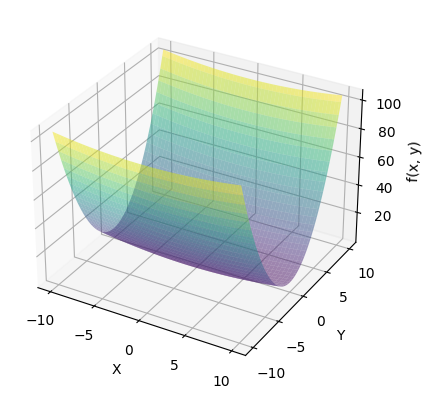

In [18]:
# create f(x, y) = (1/20)x^2 + y^2 3d graph
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return (1/20) * x**2 + y**2

# Create the grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha = 0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)');

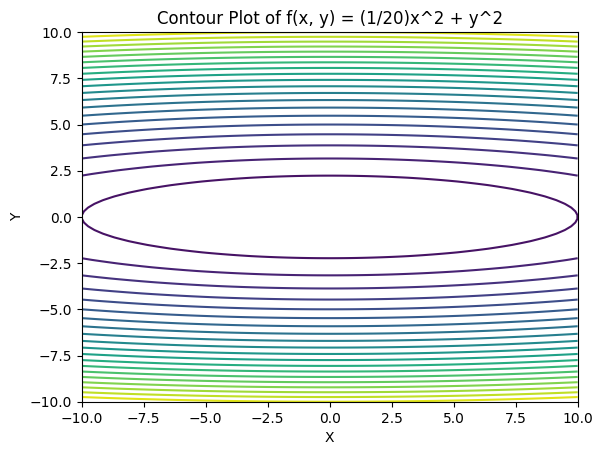

In [17]:
# Create the contour plot
def f(x, y):
    return (1/20) * x**2 + y**2

# Create the grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


plt.figure()
plt.contour(X, Y, Z, levels=20, cmap='viridis')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of f(x, y) = (1/20)x^2 + y^2');

In [16]:
# SGD : Stochastic Gradient Descent
#
# Momentum
#
# AdaGrad
#
# Adam


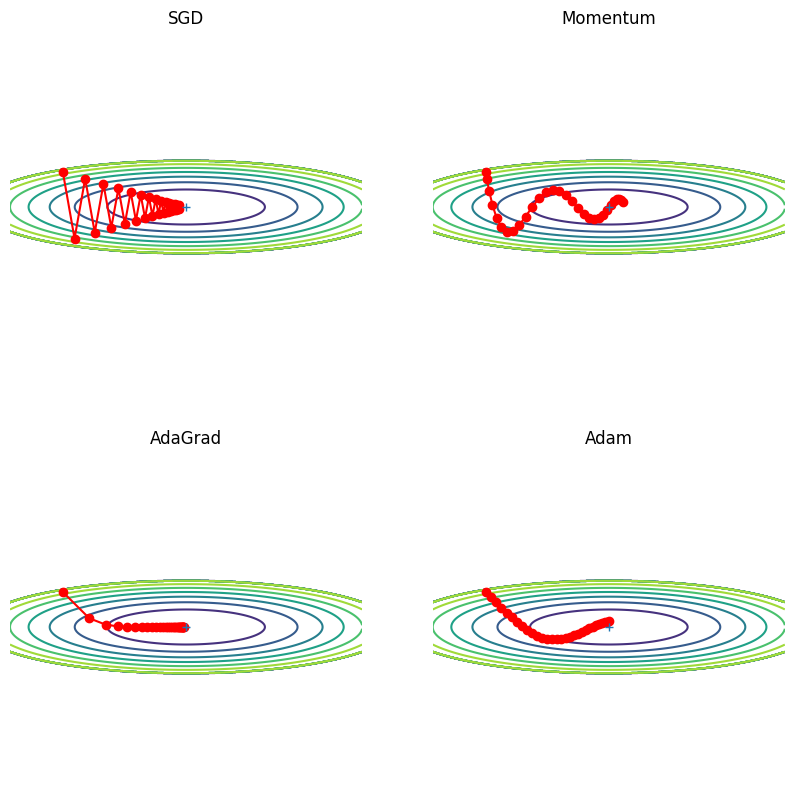

In [26]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 외곽선 단순화
mask = Z > 7
Z[mask] = 0

plt.figure(figsize=(10, 10))
idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('off')

plt.show()


===========iteration:0===========
SGD:2.4311605490402233
Momentum:2.399719672066964
AdaGrad:2.314726368109304
Adam:2.2955886531804532
===========iteration:100===========
SGD:1.5151993886904043
Momentum:0.37615410779106095
AdaGrad:0.11609659225904767
Adam:0.2990795692357957
===========iteration:200===========
SGD:0.7151926327708849
Momentum:0.2698918449703167
AdaGrad:0.11668828380517984
Adam:0.21642173375609175
===========iteration:300===========
SGD:0.46726849536939774
Momentum:0.1725013481044227
AdaGrad:0.1178154709122482
Adam:0.12857886583444267
===========iteration:400===========
SGD:0.46667943712784493
Momentum:0.127820168021262
AdaGrad:0.050788568027316655
Adam:0.043776884200565414
===========iteration:500===========
SGD:0.42201231662025396
Momentum:0.18814272574595403
AdaGrad:0.09980491062058287
Adam:0.1340011905931744
===========iteration:600===========
SGD:0.2901945898901045
Momentum:0.19749650460742985
AdaGrad:0.10885564880670373
Adam:0.14015898889707187
===========iteration:7

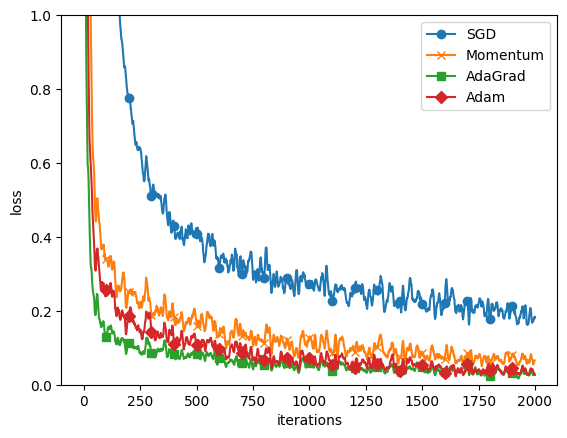

In [27]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
# weight initiall value
